# Часть 2: методы оценки Value-at-Risk

### Библиотеки

In [1]:
import pandas as pd
import numpy as np
import math
import random

import datetime
from datetime import datetime

from copy import copy, deepcopy

import sys
import warnings
import os

In [2]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, skewnorm, gennorm, t, nct, genpareto, genextreme, genhyperbolic, chi2, ncx2
from scipy.stats import skew, kurtosis

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
folder = '/content/drive/MyDrive/Kagan_VKR/'

folder_dict = {'IMOEX': '1_imoex',
               'BCOMCO': '2_bcomco',
               'EUR_RUB': '4_euro',
               'Газпром': '5_gazprom'}

In [6]:
# модуль для оценки Value-at_risk, реализованный в рамках ВКР
from var_calculation import VaR_calculation

# модуль для отрисовки результатов бэктестирования Value-at_risk, реализованный в рамках ВКР
from var_visual import VAR_visualisation

### Данные

In [7]:
if 'price_data.xlsx' in os.listdir(folder+'/data'):
    df_price = pd.read_excel(folder+'data/price_data.xlsx')
    df_price.set_index('Date', inplace=True)
else:
    print('Файл с данными не обнаружен!')

In [8]:
all_columns = df_price.columns
print(all_columns)

Index(['EUR_RUB', 'USD_RUB', 'BCOMCO', 'IMOEX', 'Газпром'], dtype='object')


In [9]:
def calculate_returns(df, name):
    df_1 = df[name].dropna()
    return df_1.pct_change().dropna()

In [10]:
window_list = [250, 500, 750, 1000, 1250]

freq_list = [5, 25, 50, 100, 150, 200]

In [11]:
def calculate_var(name, returns, file_name, models=None, window_lst=None, freq_lst=None):
    window_lst = window_list if window_lst is None else window_lst
    freq_lst = freq_list if freq_lst is None else freq_lst

    res = pd.DataFrame()
    var_obj = VaR_calculation(returns=returns, name=name)
    for w in window_lst:
        for f in freq_lst:
            df_cur = var_obj.backtest(window_size=w, recalibration_freq=f, models=models, return_=1)
            df_cur['Window'] = [w] * df_cur.shape[0]
            df_cur['Frequency'] = [f] * df_cur.shape[0]
            res = pd.concat([res, df_cur])

    name_for_save = f"/{name}_{file_name}.xlsx"
    res.to_excel(folder+folder_dict[name]+name_for_save)

In [12]:
def download_data(name, file_name):
    d = pd.read_excel(folder+folder_dict[name]+f"/{name}_{file_name}.xlsx")
    d.set_index('Date', inplace=True)
    return d

# Value-at-Risk

## BCOMCO

In [ ]:
# Вычисление

warnings.filterwarnings("ignore")

oil = calculate_returns(df=df_price, name='BCOMCO')
calculate_var(name='BCOMCO', returns=oil, file_name='final')

In [13]:
# Загрузка вычисленных ранее результатов

df_brent = download_data('BCOMCO', file_name='final')

In [14]:
oil_res = VAR_visualisation(name='BCOMCO', df_var=df_brent)

#### Параметры

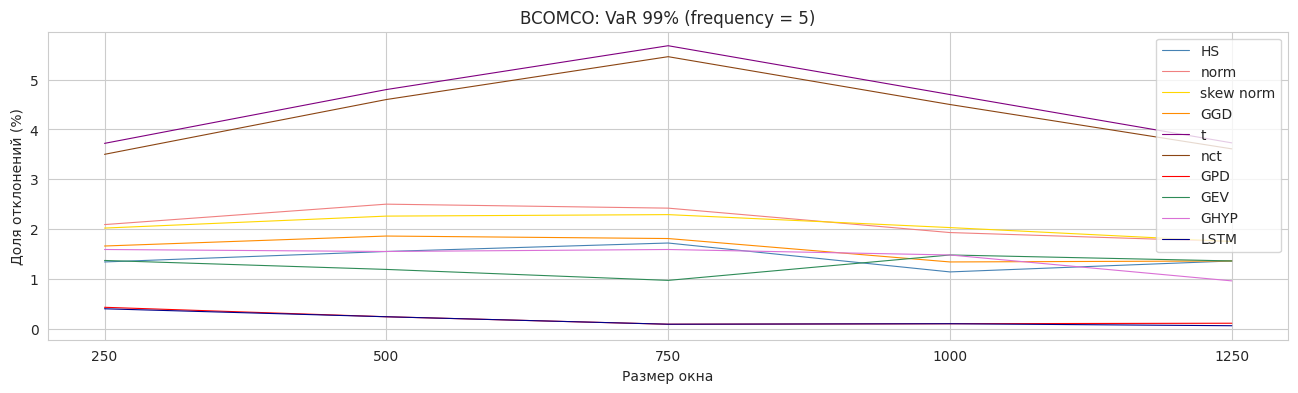

In [46]:
oil_res.plot_parametr_window(freq=5)

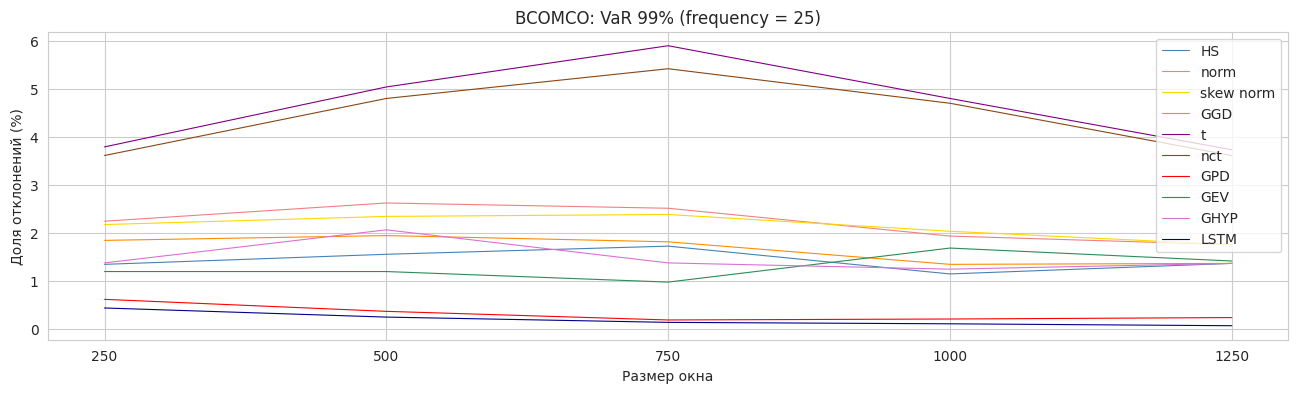

In [16]:
oil_res.plot_parametr_window(freq=25)

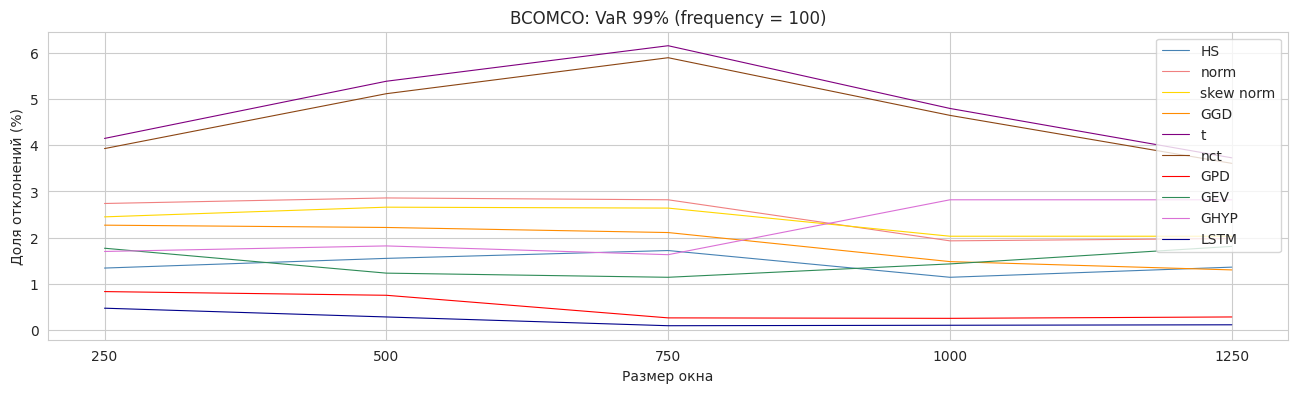

In [17]:
oil_res.plot_parametr_window(freq=100)

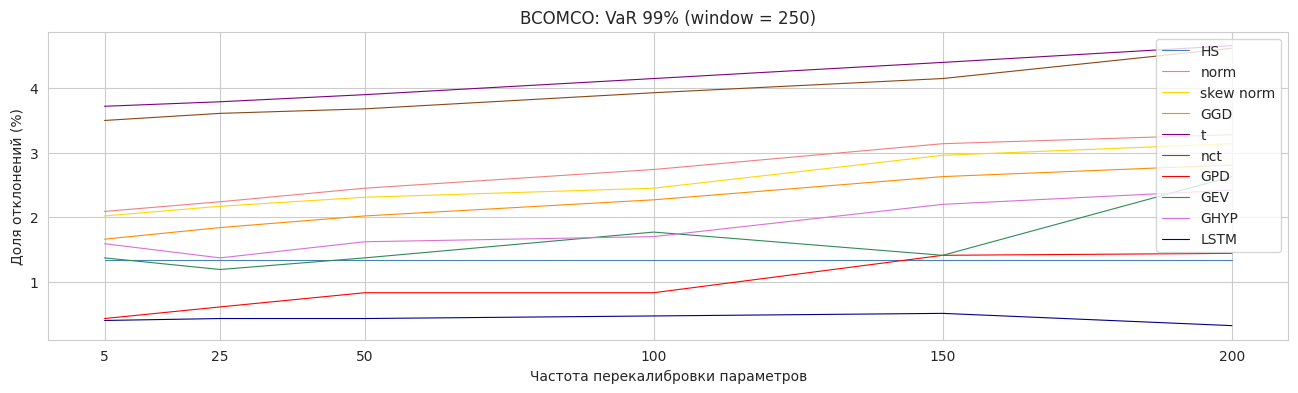

In [18]:
oil_res.plot_parametr_frequency(window=250)

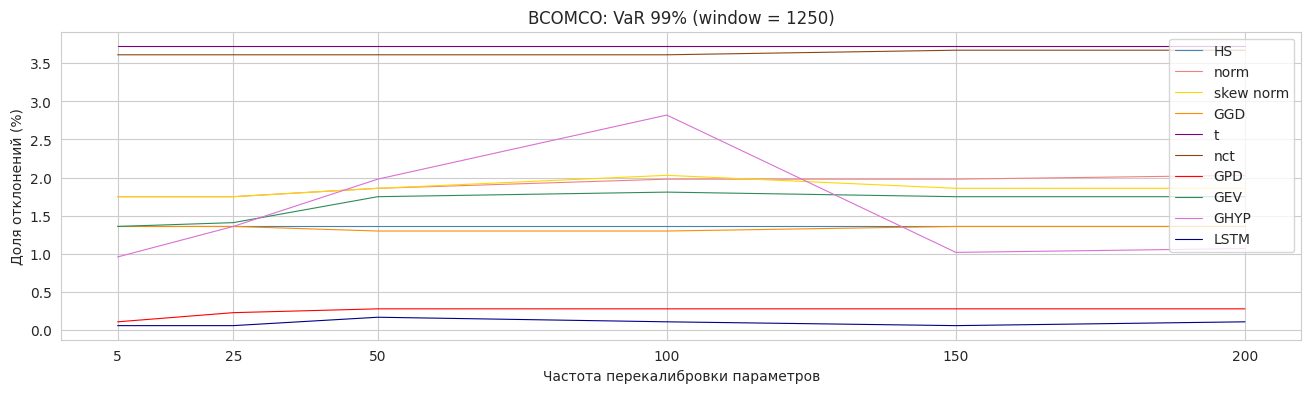

In [19]:
oil_res.plot_parametr_frequency(window=1250)

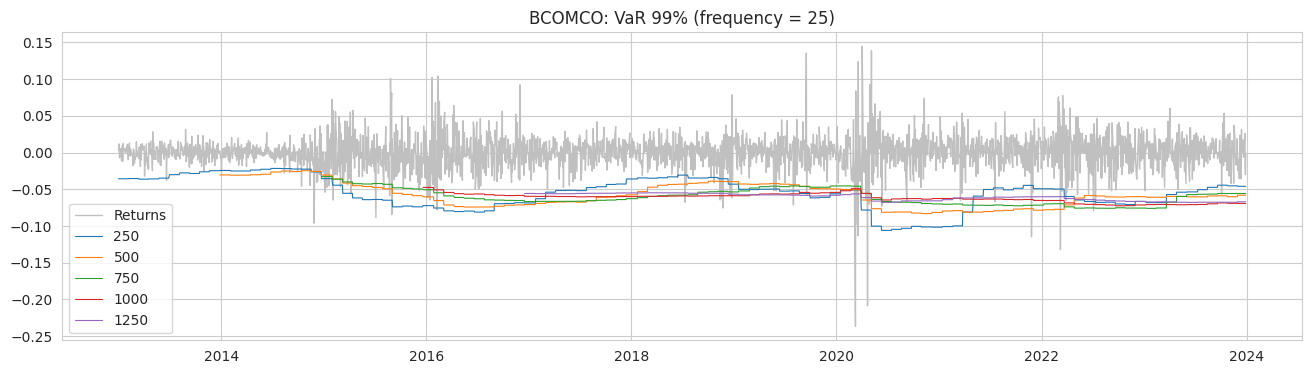

In [22]:
oil_res.plot_parametr_backtest(model='GGD', parametr='window', freq=25)

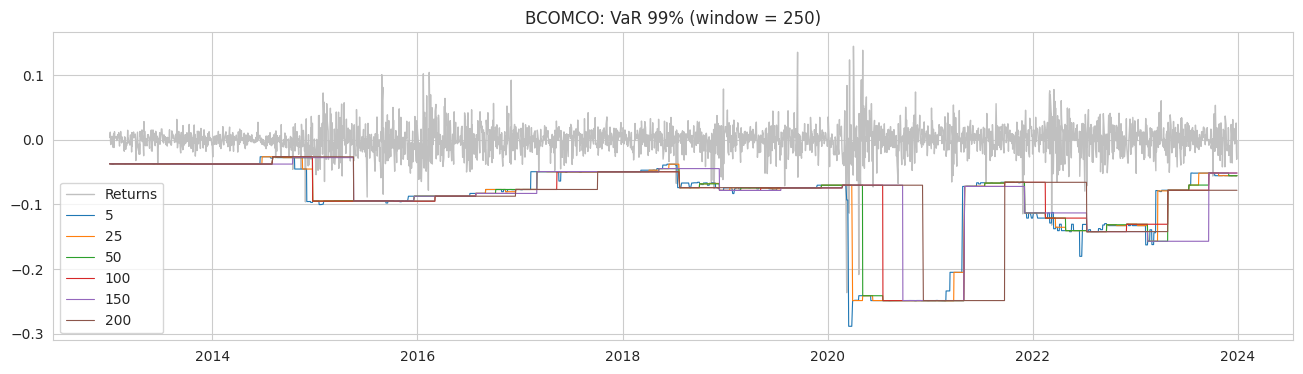

In [26]:
oil_res.plot_parametr_backtest(model='GPD', parametr='frequency', window=250)

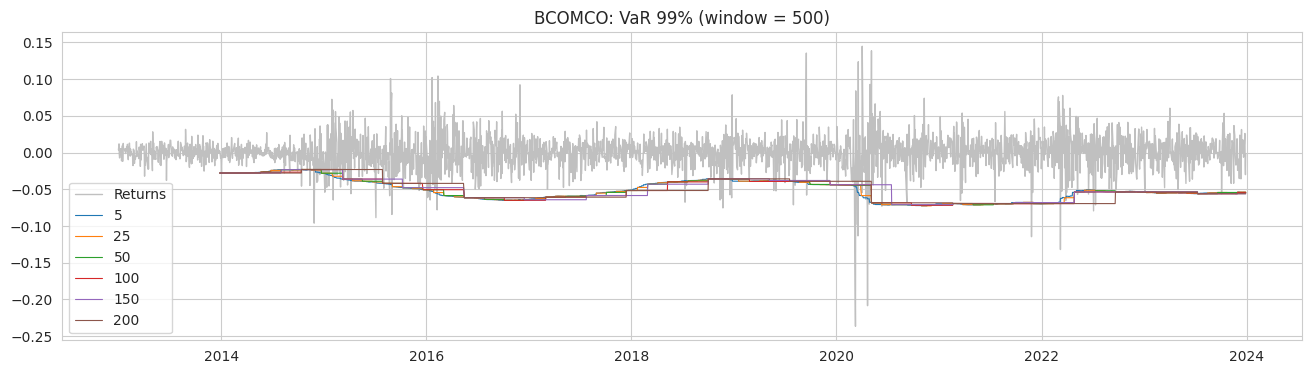

In [29]:
oil_res.plot_parametr_backtest(model='norm', parametr='frequency', window=500)

#### Тесты

In [34]:
oil_res.get_backtest_results()

Доля отклонений (%) 



Исторический метод  Нормальное распределение  \
Window Freq                                                 
250    5                   1.34                      2.09   
       25                  1.34                      2.24   
       50                  1.34                      2.45   
       100                 1.34                      2.74   
       150                 1.34                      3.14   
       200                 1.34                      3.28   
500    5                   1.55                      2.50   
       25                  1.55                      2.62   
       50                  1.55                      2.74   
       100                 1.55                      2.86   
       150                 1.55                      3.01   
       200                 1.55                      3.33   
750    5                   1.72                      2.42   
       25                  1.72                      2.51   
       50                  1.72                      2.64   
       100                 1.72                      2.82   
       150                 1.72                      2.82   
       200                 1.72                      3.08   
1000   5                   1.14                      1.93   
       25                  1.14                      1.93   
       50                  1.14                      1.93   
       100                 1.14                      1.93   
       150                 1.14                      2.08   
       200                 1.14                      2.08   
1250   5                   1.36                      1.75   
       25                  1.36                      1.75   
       50                  1.36                      1.86   
       100                 1.36                      1.98   
       150                 1.36                      1.98   
       200                 1.36                      2.03   

             Скошенное нормальное распределение  \
Window Freq                                       
250    5                                   2.02   
       25                                  2.17   
       50                                  2.31   
       100                                 2.45   
       150                                 2.96   
       200                                 3.14   
500    5                                   2.26   
       25                                  2.34   
       50                                  2.42   
       100                                 2.66   
       150                                 2.78   
       200                                 2.98   
750    5                                   2.29   
       25                                  2.38   
       50                                  2.47   
       100                                 2.64   
       150                                 2.60   
       200                                 2.91   
1000   5                                   2.03   
       25                                  2.03   
       50                                  2.03   
       100                                 2.03   
       150                                 2.13   
       200                                 2.13   
1250   5                                   1.75   
       25                                  1.75   
       50                                  1.86   
       100                                 2.03   
       150                                 1.86   
       200                                 1.86   

             Обобщенное нормальное распределение  Распределение Стьюдента  \
Window Freq                                                                 
250    5                                    1.66                     3.72   
       25                                   1.84                     3.79   
       50                                   2.02                     3.90   
       100                                

In [32]:
oil_res.test_kupiec_all()

In [33]:
oil_res.test_christoffersen_all()

#### Динамика

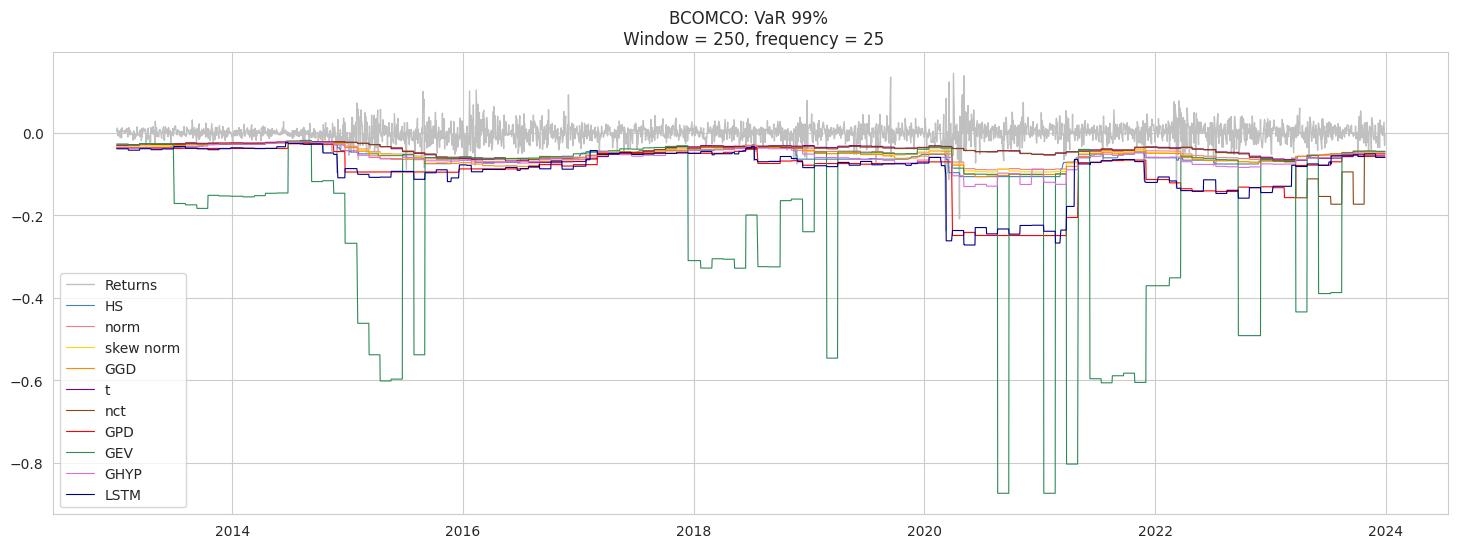

In [35]:
oil_res.plot_backtest(window=250, freq=25)

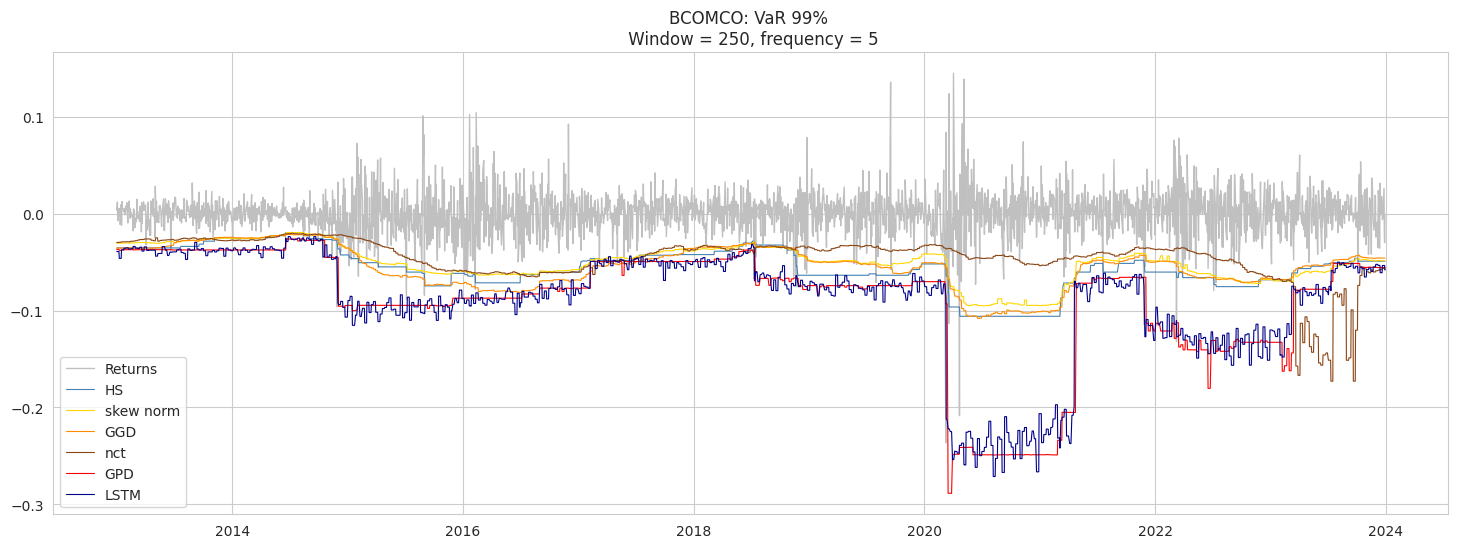

In [42]:
oil_res.plot_backtest(window=250, freq=5, models=['HS', 'skew norm', 'GGD', 'nct', 'GPD', 'LSTM'])

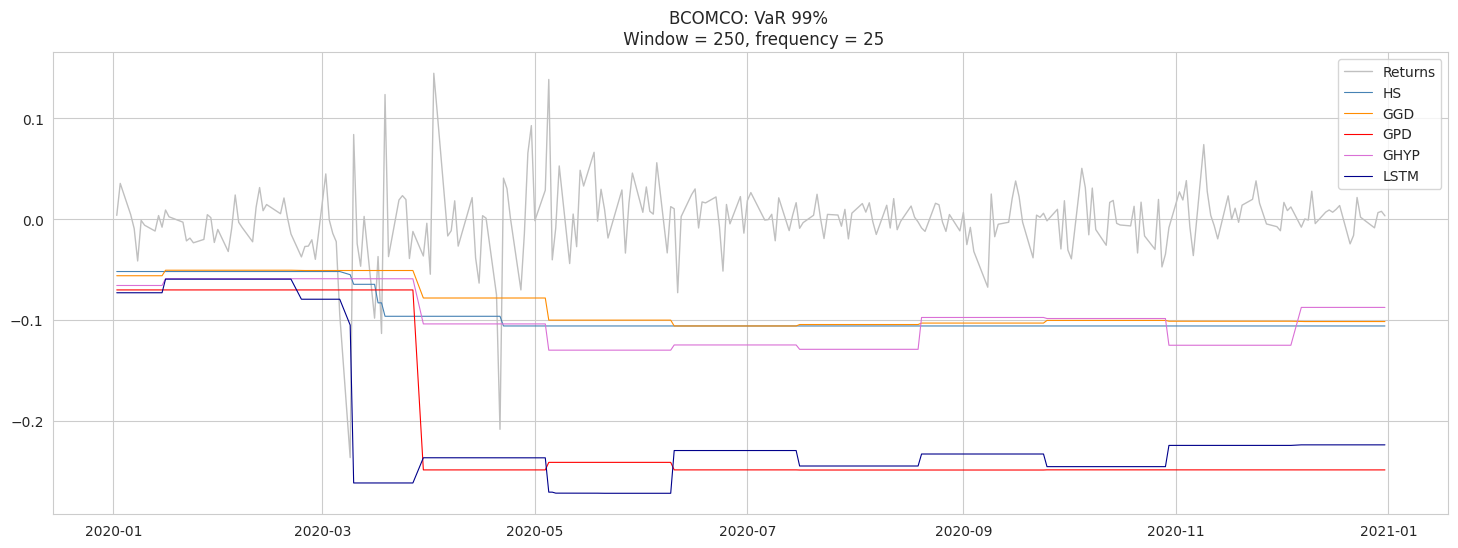

In [44]:
oil_res.plot_backtest(window=250, freq=25,
                      models=['HS', 'GGD', 'GPD', 'GHYP', 'LSTM'],
                      start_date='2020-01-01',
                      end_date='2020-12-31')

## IMOEX

#### Расчет

In [ ]:
imoex = calculate_returns(df=df_price, name='IMOEX')

In [ ]:
warnings.filterwarnings("ignore")

calculate_var(name='IMOEX', returns=imoex, file_name='var99')

### LSTM

In [ ]:
imoex_df = calculate_returns(df=df_price, name='IMOEX')

In [ ]:
var_obj = VaR_calculation(returns=imoex_df, name='IMOEX')

In [ ]:
df_cur = var_obj.backtest(window_size=250, recalibration_freq=25, models=['HS', 'GPD', 'LSTM'], return_=1)

In [ ]:
df_cur['Window'] = [250] * df_cur.shape[0]
df_cur['Frequency'] = [25] * df_cur.shape[0]

#df_cur.to_excel(folder+"imoex_lstm_test.xlsx")

In [ ]:
tst_vs = VAR_visualisation(name='IMOEX', df_var=df_cur, models=['HS', 'GPD', 'LSTM'])

In [ ]:
tst_vs.calculate_breakdown(window=250, freq=25)

,Кол-во пробоев,Доля пробоев (%)
HS,42,1.52
GPD,24,0.87
LSTM,15,0.54


In [ ]:
tst_vs.test_kupiec_all()

,,Исторический метод,Обобщенное Парето распределение,LSTM
Window,Freq,,,
250,25,0,1,0


In [ ]:
tst_vs.test_christoffersen_all()

,,Исторический метод,Обобщенное Парето распределение,LSTM
Window,Freq,,,
250,25,0,0,1


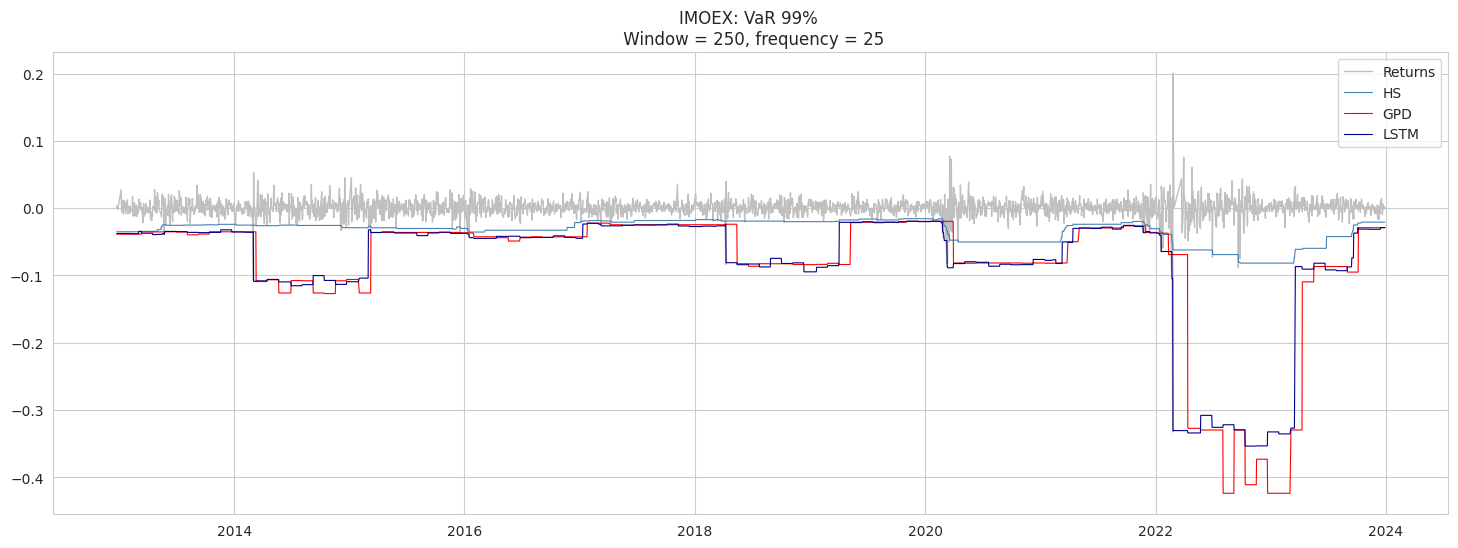

In [ ]:
tst_vs.plot_backtest(window=250, freq=25)

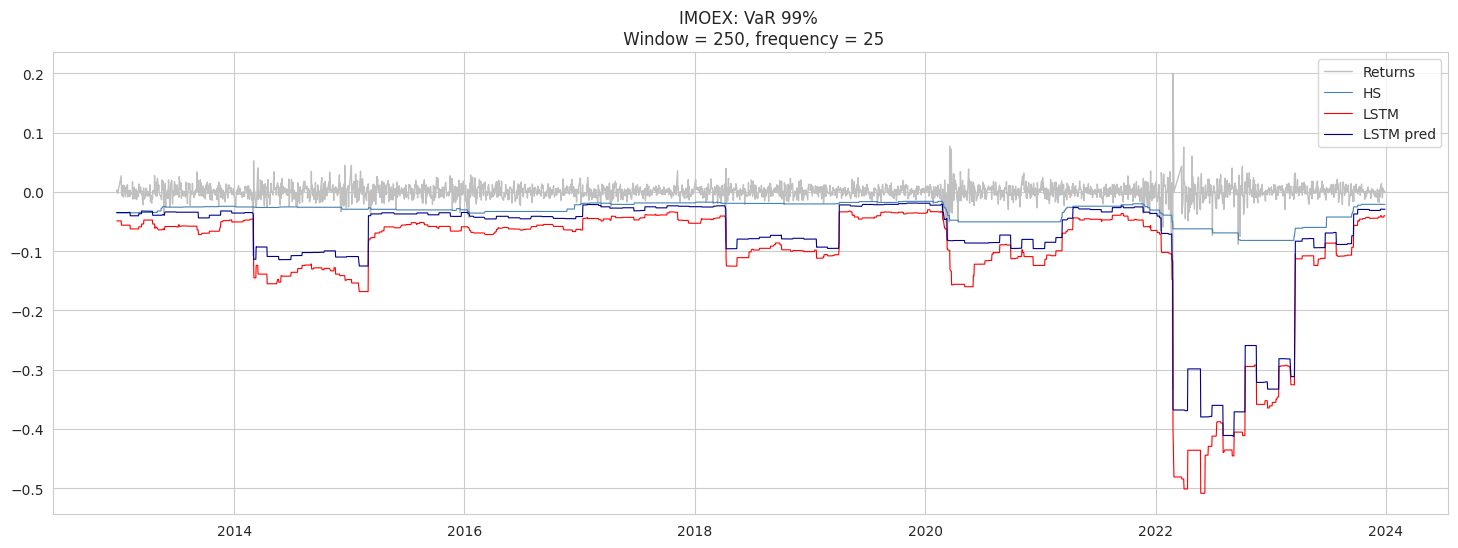

In [ ]:
tst_vs.plot_backtest(window=250, freq=25)

### Анализ полученных результатов

In [ ]:
# Результаты вычисления VaR

df_imoex = download_data('IMOEX', file_name='var99 full')

In [ ]:
imoex_res = VAR_visualisation(name='IMOEX', df_var=df_imoex)

Тест Купика

In [ ]:
imoex_res.test_kupiec(window=250, freq=50)

,Kupiec POF,p value,H0 принимается
Исторический метод,6.533184,0.01059,0.0
Нормальное распределение,8.327497,0.00390,0.0
Скошенное нормальное распределение,8.327497,0.00390,0.0
Обобщенное нормальное распределение,2.350325,0.12526,1.0
Распределение Стьюдента,51.931029,0.00000,0.0
Нецентральное распределение Стьюдента,51.931029,0.00000,0.0
Обобщенное Парето распределение,1.742437,0.18683,1.0
Обобщенное распределение экстремальных значений,0.498804,0.48003,1.0
Обобщенное гиперболическое распределение,1.841900,0.17473,1.0
LSTM,25.073376,0.00000,0.0


In [ ]:
imoex_res.test_kupiec_all()

Тест Кристофферсена

In [ ]:
imoex_res.test_christoffersen(window=500, freq=25)

,LR_ind,p value,H0 принимается
Исторический метод,4.613343,0.03172,0.0
Нормальное распределение,6.249280,0.01242,0.0
Скошенное нормальное распределение,5.948968,0.01473,0.0
Обобщенное нормальное распределение,3.339047,0.06765,1.0
Распределение Стьюдента,15.678217,0.00008,0.0
Нецентральное распределение Стьюдента,9.129685,0.00251,0.0
Обобщенное Парето распределение,0.012769,0.91003,1.0
Обобщенное распределение экстремальных значений,0.289846,0.59032,1.0
Обобщенное гиперболическое распределение,8.336990,0.00388,0.0
LSTM,0.007180,0.93247,1.0


In [ ]:
imoex_res.test_christoffersen_all()

In [ ]:
imoex_res.get_backtest_results()

Доля отклонений (%) 



Исторический метод  Нормальное распределение  \
Window Freq                                                 
250    5                   1.52                      1.59   
       25                  1.52                      1.63   
       50                  1.52                      1.59   
       75                  1.52                      1.63   
       100                 1.52                      1.67   
       200                 1.52                      1.67   
500    5                   1.63                      1.39   
       25                  1.63                      1.39   
       50                  1.63                      1.39   
       75                  1.63                      1.43   
       100                 1.63                      1.43   
       200                 1.63                      1.47   
750    5                   1.37                      1.50   
       25                  1.37                      1.55   
       50                  1.37                      1.55   
       75                  1.37                      1.50   
       100                 1.37                      1.55   
       200                 1.37                      1.50   
1000   5                   1.44                      1.64   
       25                  1.44                      1.69   
       50                  1.44                      1.69   
       75                  1.44                      1.69   
       100                 1.44                      1.69   
       200                 1.44                      1.69   
1250   5                   1.53                      1.87   
       25                  1.53                      1.93   
       50                  1.53                      1.93   
       75                  1.53                      1.93   
       100                 1.53                      1.93   
       200                 1.53                      1.93   
1500   5                   1.92                      2.32   
       25                  1.92                      2.32   
       50                  1.92                      2.32   
       75                  1.92                      2.32   
       100                 1.92                      2.32   
       200                 1.92                      2.32   

             Скошенное нормальное распределение  \
Window Freq                                       
250    5                                   1.52   
       25                                  1.59   
       50                                  1.59   
       75                                  1.59   
       100                                 1.63   
       200                                 1.63   
500    5                                   1.39   
       25                                  1.43   
       50                                  1.35   
       75                                  1.43   
       100                                 1.35   
       200                                 1.39   
750    5                                   1.33   
       25                                  1.37   
       50                                  1.42   
       75                                  1.42   
       100                                 1.42   
       200                                 1.42   
1000   5                                   1.44   
       25                                  1.49   
       50                                  1.49   
       75                                  1.54   
       100                                 1.54   
       200                                 1.54   
1250   5                                   1.76   
       25                                  1.82   
       50                                  1.82   
       75                                  1.76   
       100                                 1.82   
       200                                 1.82   
1500   5                                   1.99   
       25  

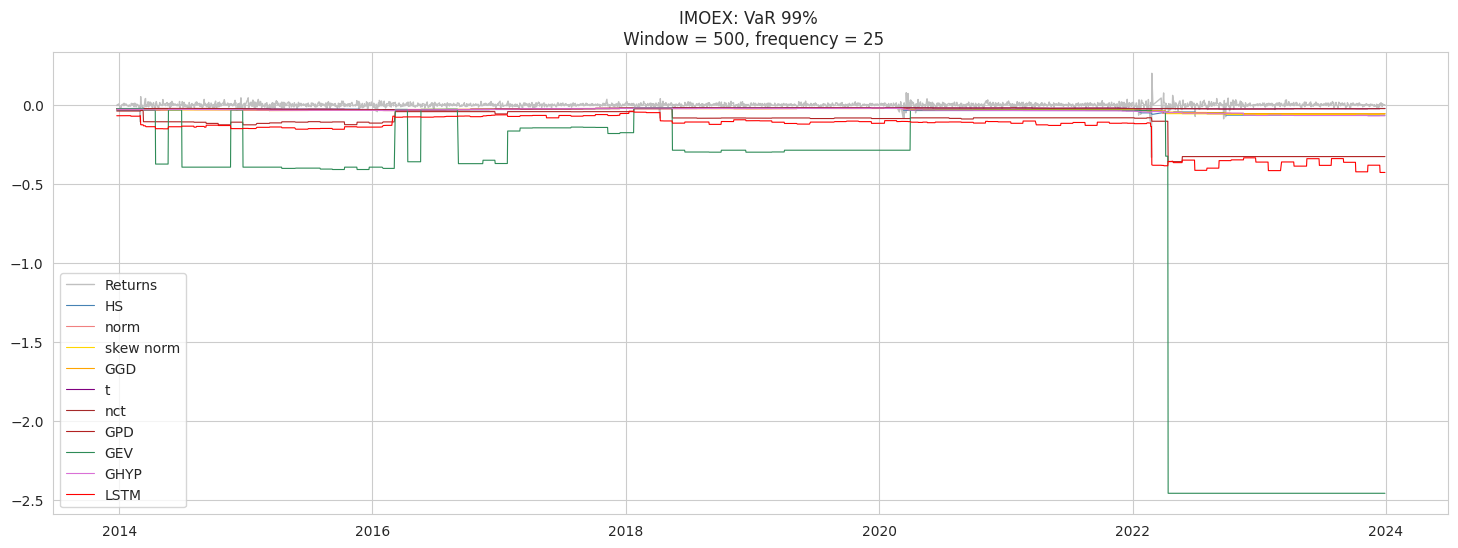

In [ ]:
imoex_res.plot_backtest(window=500, freq=25)

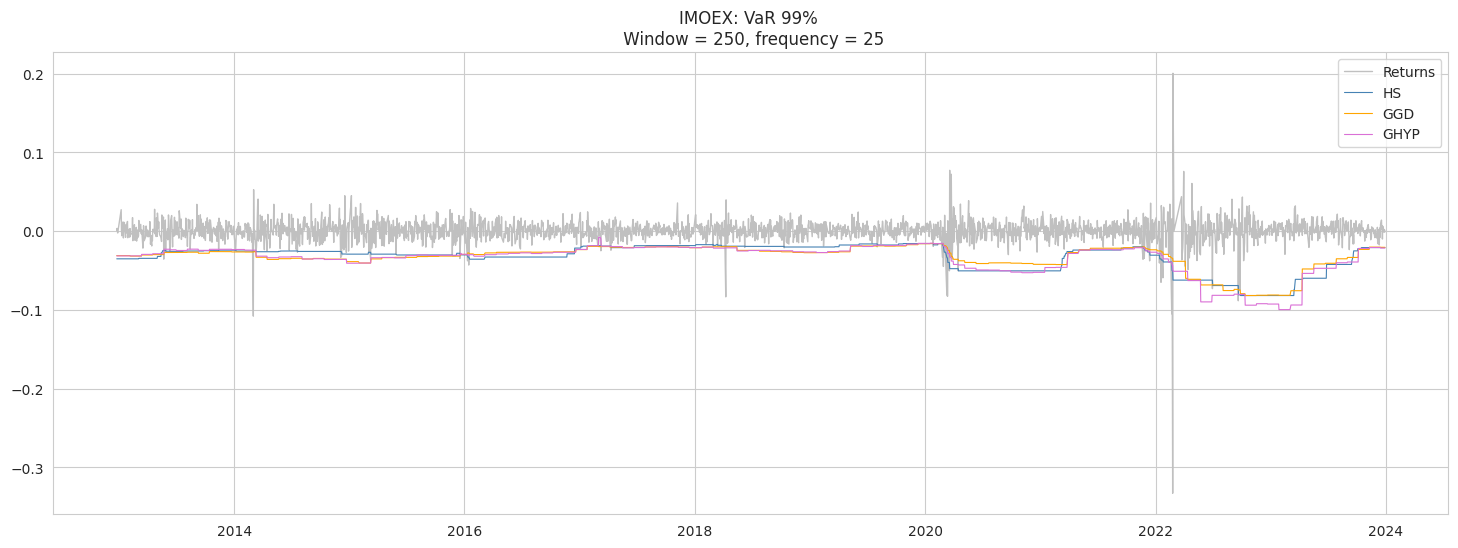

In [ ]:
imoex_res.plot_backtest(window=250, freq=25, models=['HS', 'GGD', 'GHYP'])

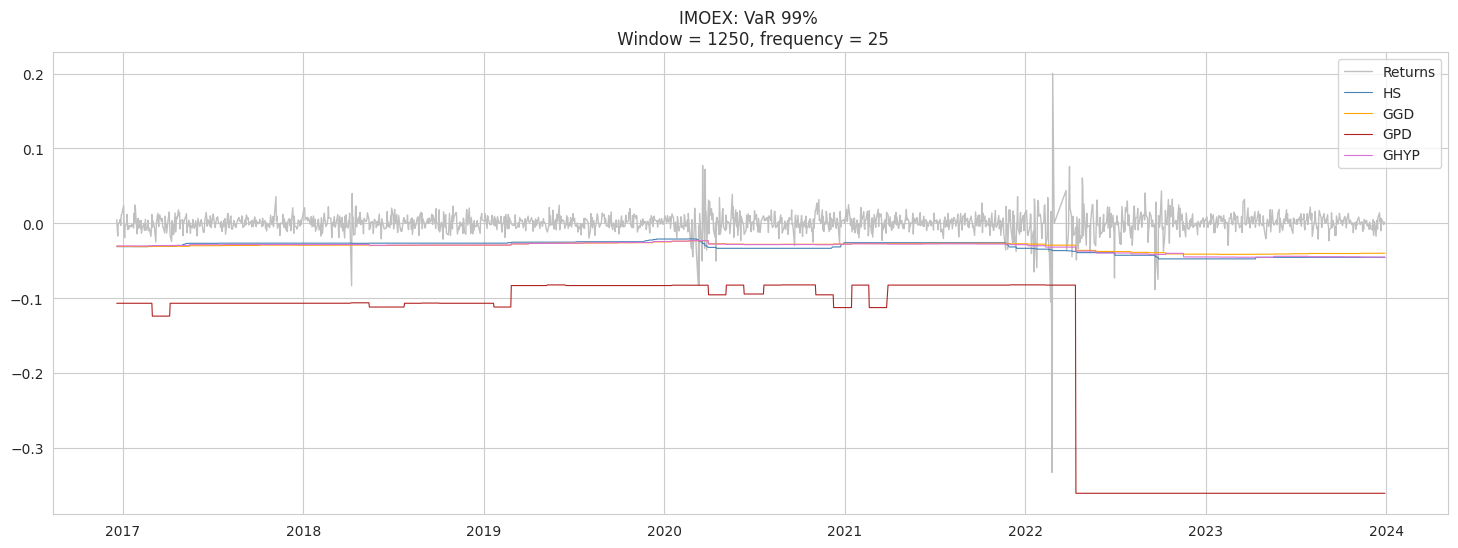

In [ ]:
imoex_res.plot_backtest(window=1250, freq=25, models=['HS', 'GGD', 'GPD', 'GHYP'])

Зависимость доли отклонений одного параметра при фиксировании второго для различных моделей.

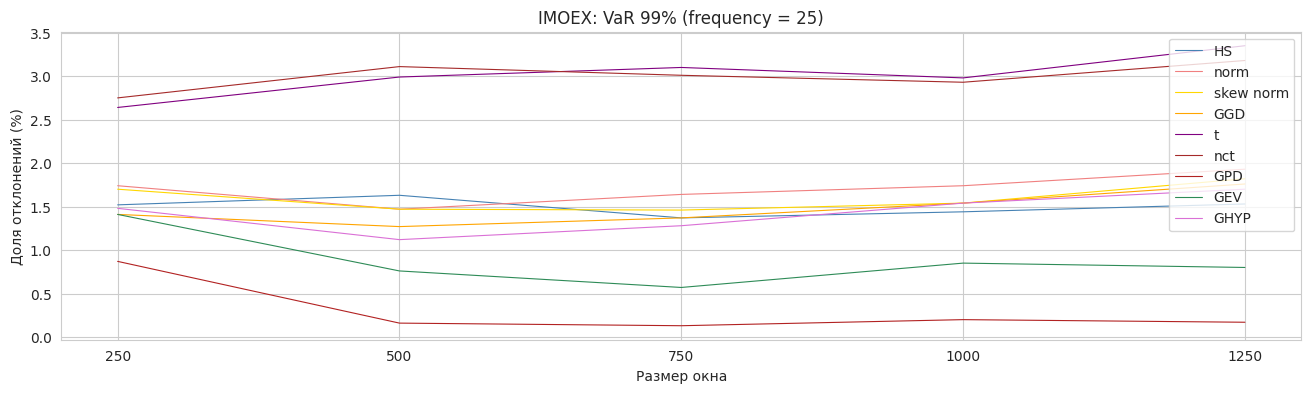

In [ ]:
imoex_res.plot_parametr_window(freq=25)

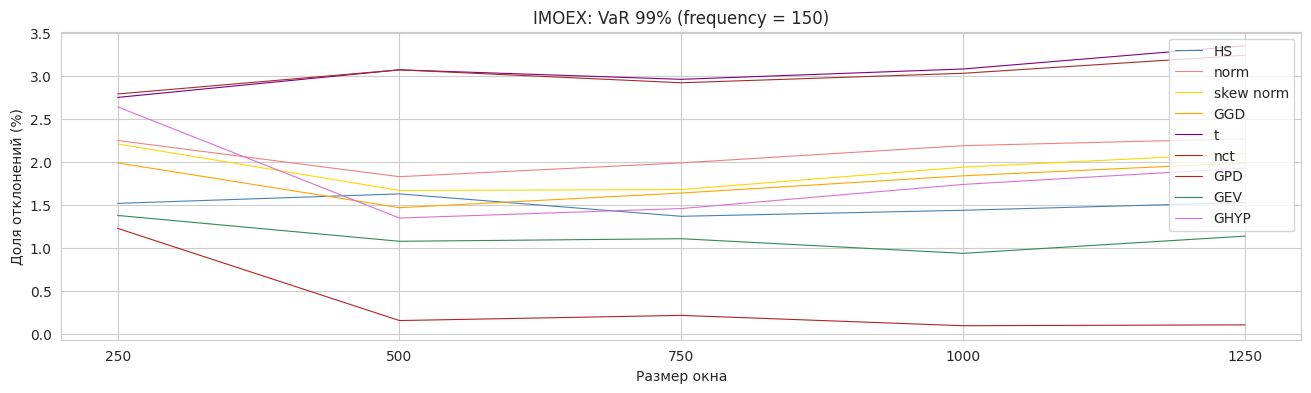

In [ ]:
imoex_res.plot_parametr_window(freq=150)

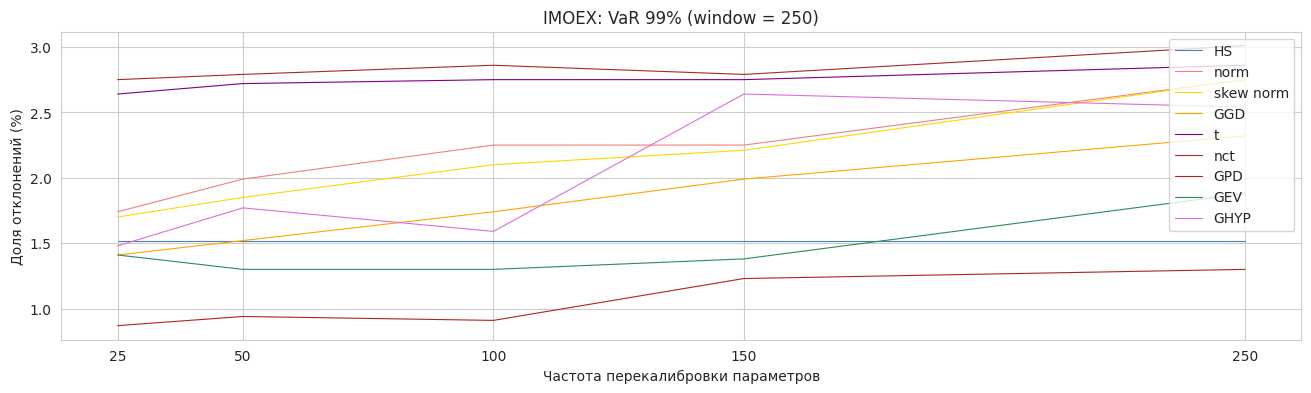

In [ ]:
imoex_res.plot_parametr_frequency(window=250)

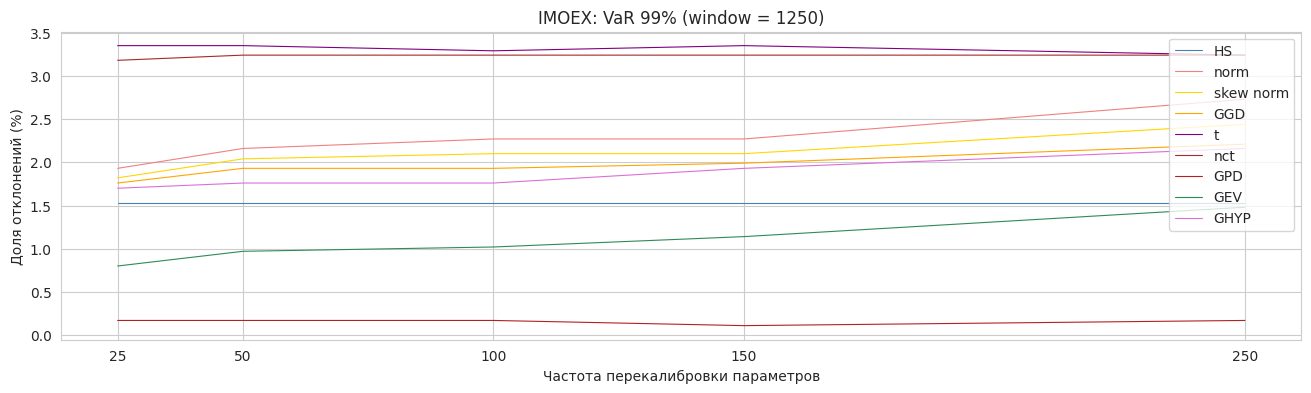

In [ ]:
imoex_res.plot_parametr_frequency(window=1250)

## Газпром

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
gazp = calculate_returns(df=df_price, name='Газпром')
calculate_var(name='Газпром', returns=gazp, file_name='final')

**Анализ полученных результатов**

In [ ]:
df_gazp = download_data('Газпром', file_name='final')

In [ ]:
gazp_res = VAR_visualisation(name='Газпром', df_var=df_gazp)

#### Тесты

In [ ]:
gazp_res.get_backtest_results()

Доля отклонений (%) 



Исторический метод  Нормальное распределение  \
Window Freq                                                 
250    5                   1.53                      1.43   
       25                  1.53                      1.47   
       50                  1.53                      1.53   
       100                 1.53                      1.57   
       150                 1.53                      1.74   
       200                 1.53                      1.77   
500    5                   1.49                      1.45   
       25                  1.49                      1.53   
       50                  1.49                      1.64   
       100                 1.49                      1.75   
       150                 1.49                      1.60   
       200                 1.49                      1.90   
750    5                   1.32                      1.48   
       25                  1.32                      1.56   
       50                  1.32                      1.69   
       100                 1.32                      1.64   
       150                 1.32                      1.77   
       200                 1.32                      1.64   
1000   5                   1.51                      1.42   
       25                  1.51                      1.47   
       50                  1.51                      1.65   
       100                 1.51                      1.70   
       150                 1.51                      1.65   
       200                 1.51                      1.65   
1250   5                   1.55                      1.55   
       25                  1.55                      1.60   
       50                  1.55                      1.66   
       100                 1.55                      1.66   
       150                 1.55                      1.66   
       200                 1.55                      1.81   

             Скошенное нормальное распределение  \
Window Freq                                       
250    5                                   1.64   
       25                                  1.64   
       50                                  1.77   
       100                                 1.88   
       150                                 2.01   
       200                                 2.08   
500    5                                   1.60   
       25                                  1.68   
       50                                  1.83   
       100                                 1.90   
       150                                 1.68   
       200                                 2.01   
750    5                                   1.60   
       25                                  1.64   
       50                                  1.93   
       100                                 1.85   
       150                                 1.97   
       200                                 1.81   
1000   5                                   1.60   
       25                                  1.65   
       50                                  1.88   
       100                                 1.97   
       150                                 1.92   
       200                                 1.97   
1250   5                                   1.81   
       25                                  1.86   
       50                                  1.92   
       100                                 1.97   
       150                                 2.02   
       200                                 2.28   

             Обобщенное нормальное распределение  Распределение Стьюдента  \
Window Freq                                                                 
250    5                                    0.85                     3.04   
       25                                   0.92                     3.07   
       50                                   0.95                     3.04   
       100                                

In [ ]:
gazp_res.test_kupiec_all()

In [ ]:
gazp_res.test_christoffersen_all()

#### Параметры

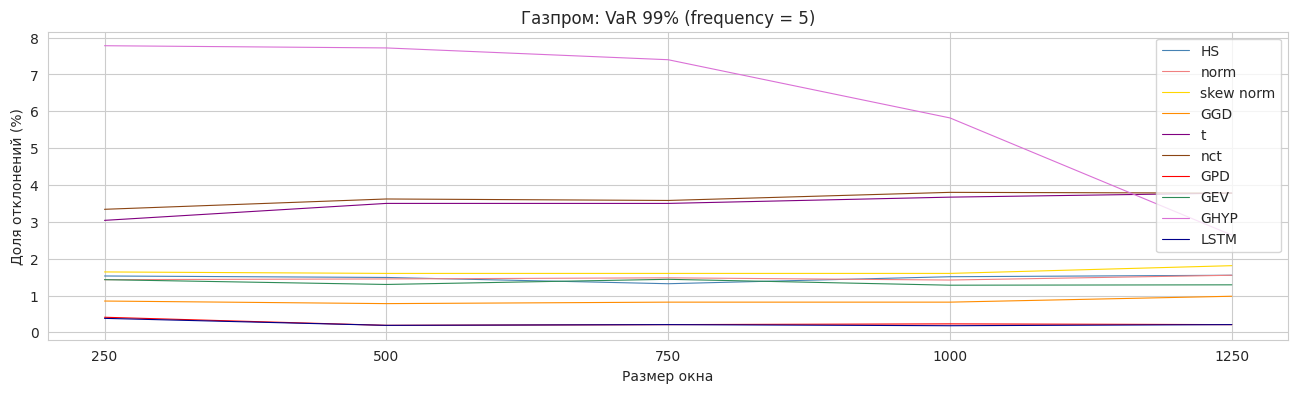

In [ ]:
gazp_res.plot_parametr_window(freq=5)

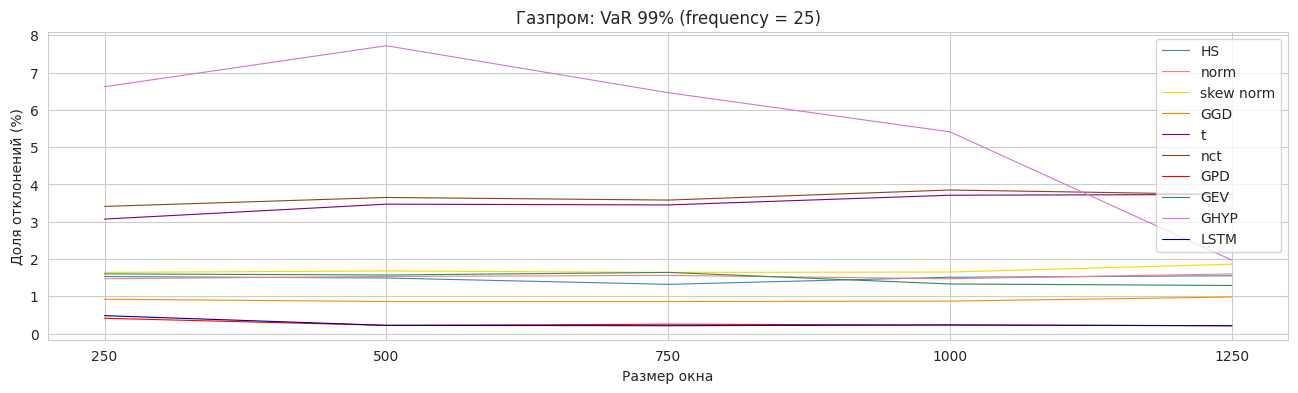

In [ ]:
gazp_res.plot_parametr_window(freq=25)

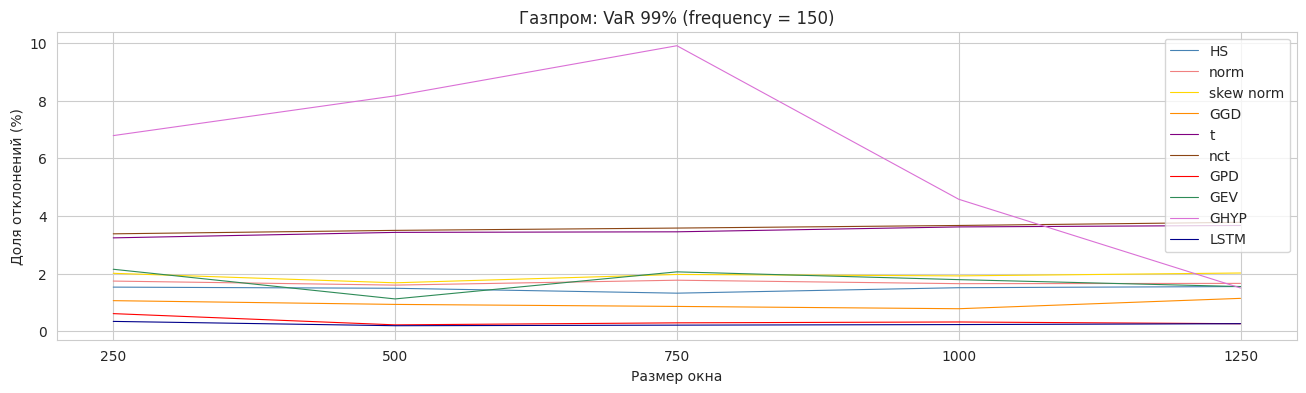

In [ ]:
gazp_res.plot_parametr_window(freq=150)

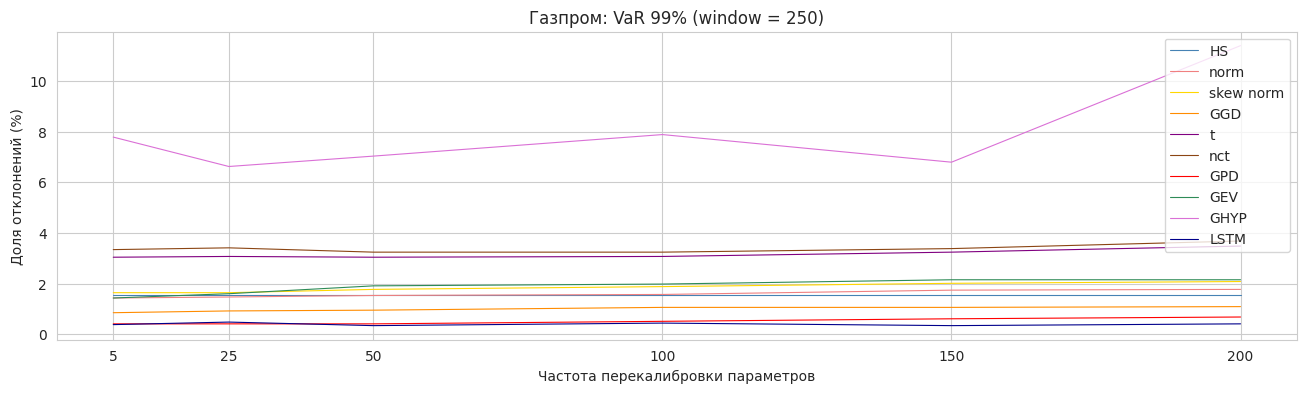

In [ ]:
gazp_res.plot_parametr_frequency(window=250)

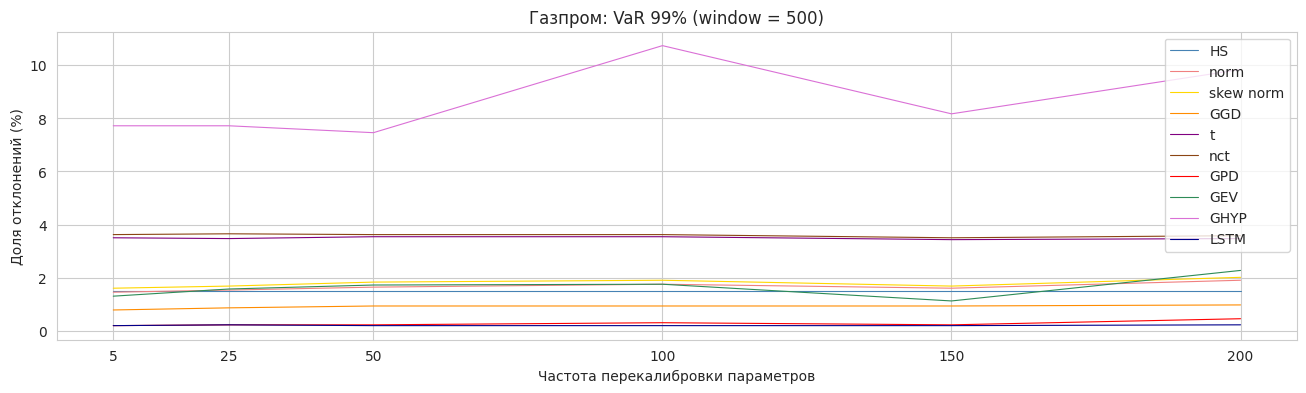

In [ ]:
gazp_res.plot_parametr_frequency(window=500)

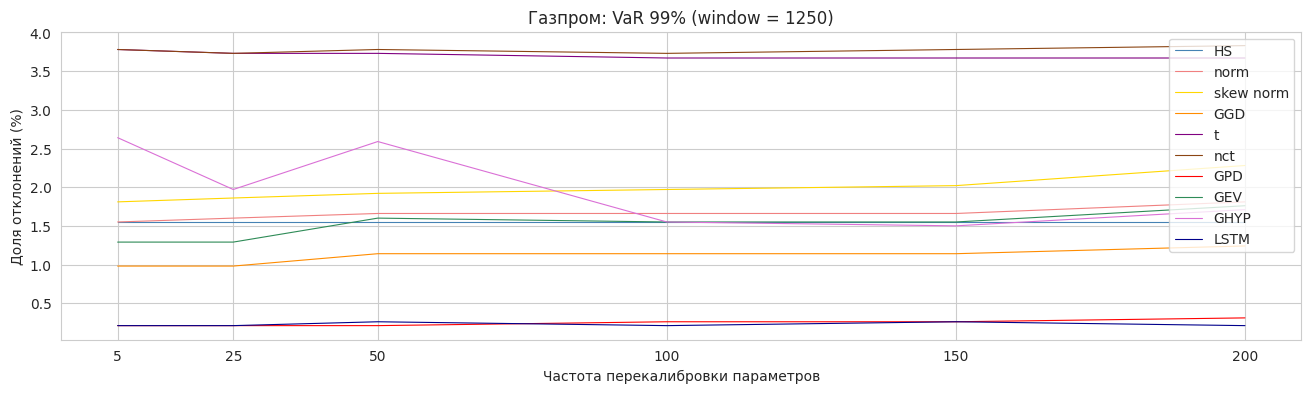

In [ ]:
gazp_res.plot_parametr_frequency(window=1250)

#### Результаты

Посмотрим на результаты бэктеста с окном в год и минимальной частотой перекалибровки.

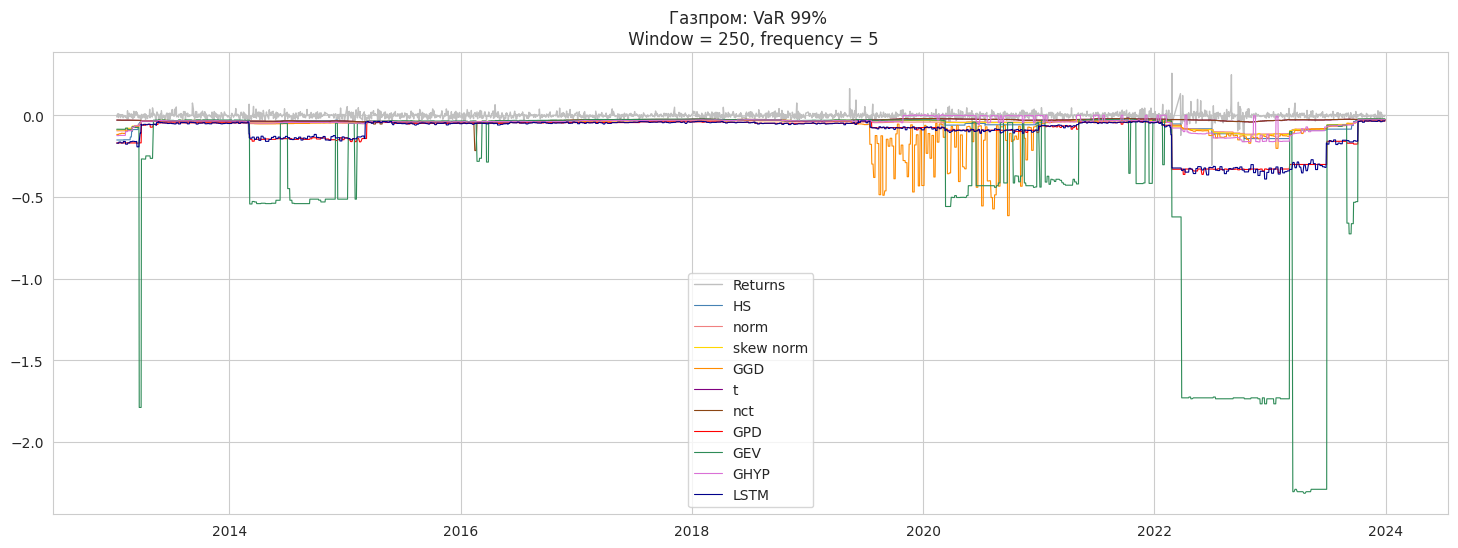

In [ ]:
gazp_res.plot_backtest(window=250, freq=5)

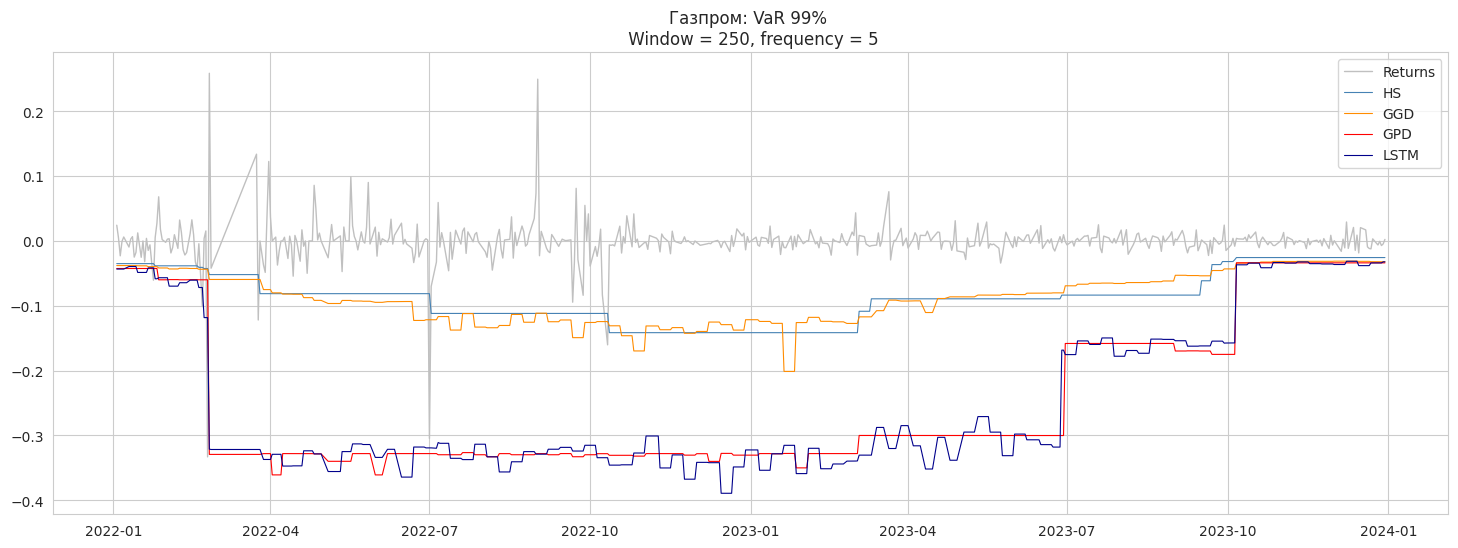

In [ ]:
gazp_res.plot_backtest(window=250, freq=5,
                       models=['HS', 'GGD', 'GPD', 'LSTM'],
                       start_date = '2022-01-01')

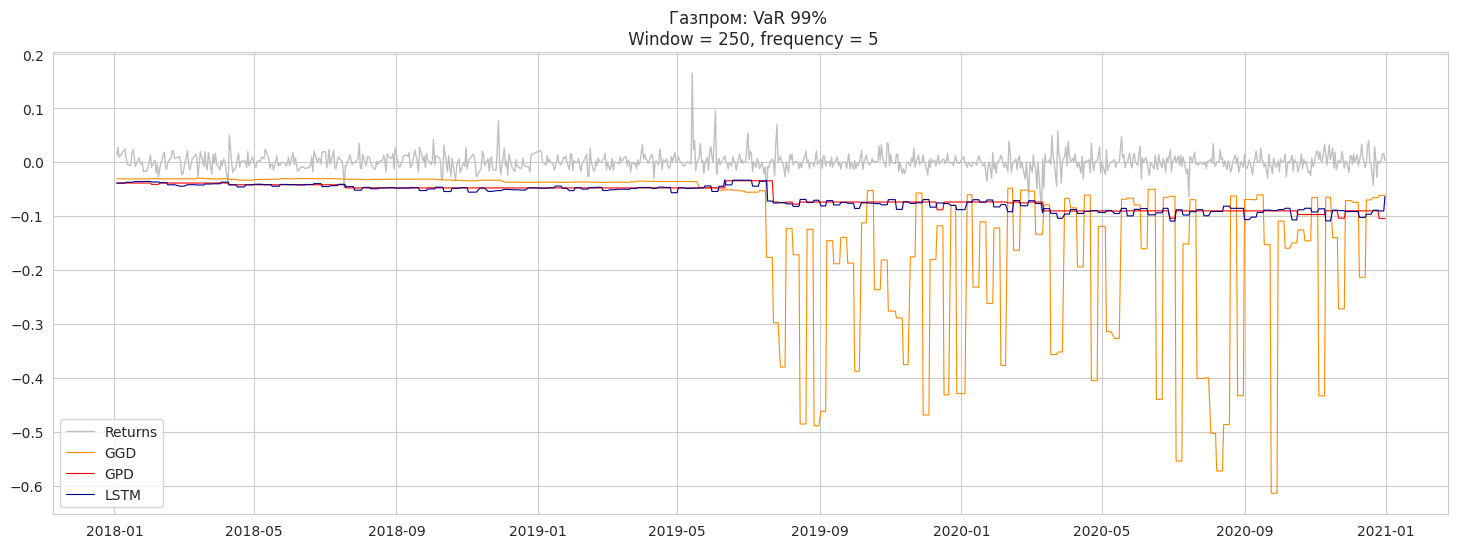

In [ ]:
gazp_res.plot_backtest(window=250, freq=5,
                       models=['GGD', 'GPD', 'LSTM'],
                       start_date = '2018-01-01', end_date='2021-01-01')

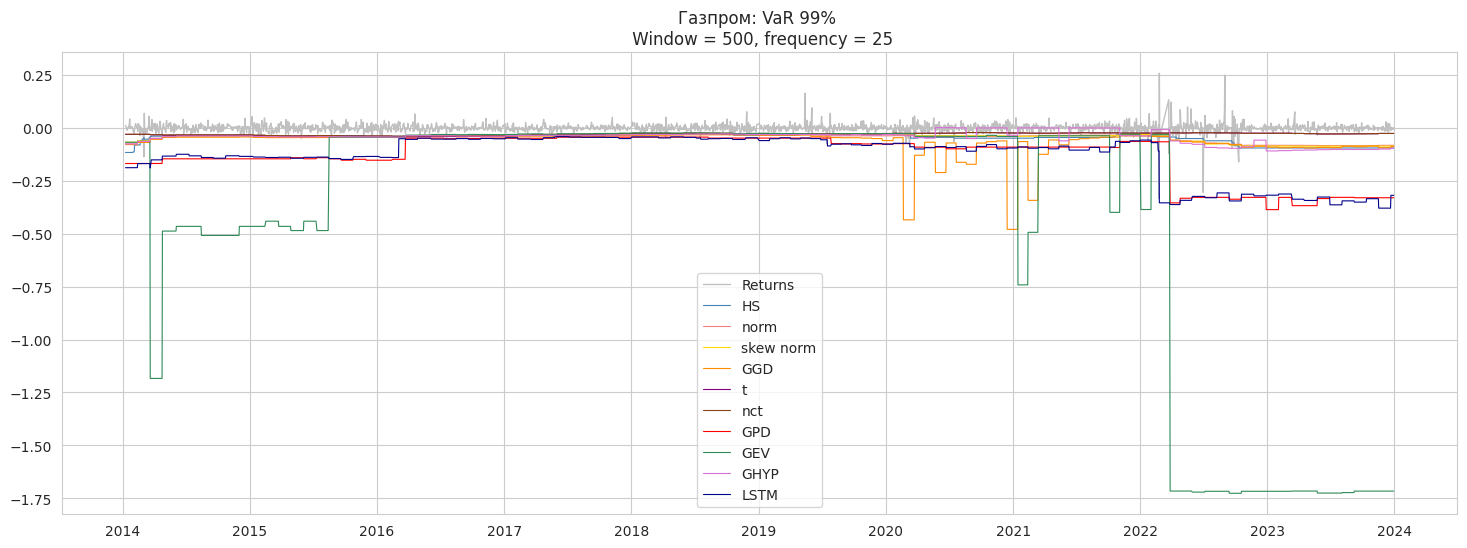

In [ ]:
gazp_res.plot_backtest(window=500, freq=25)

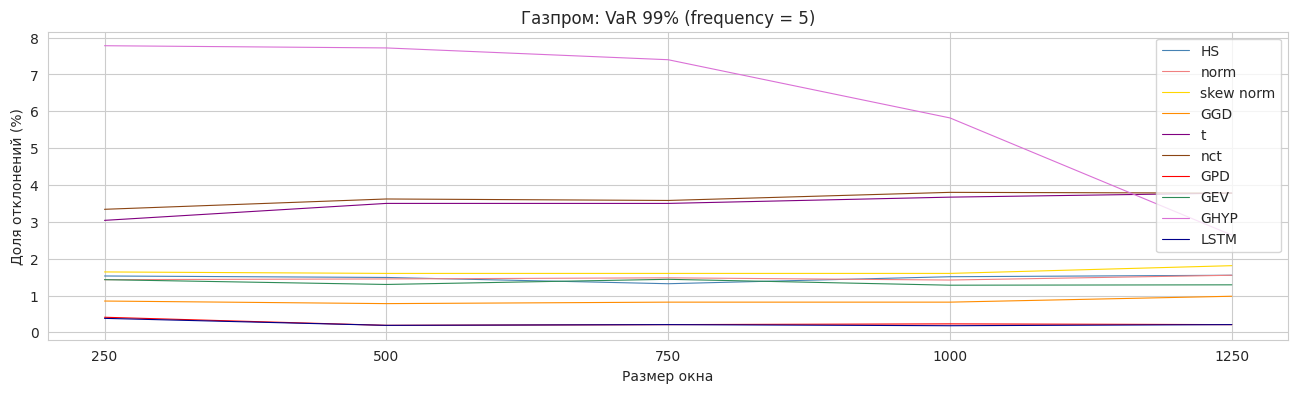

In [ ]:
gazp_res.plot_parametr_window(freq=5)

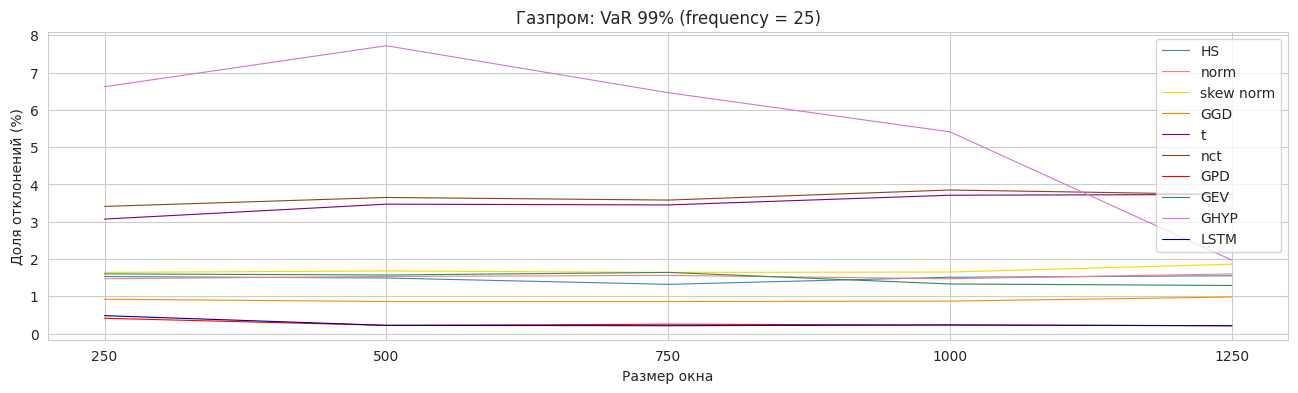

In [ ]:
gazp_res.plot_parametr_window(freq=25)

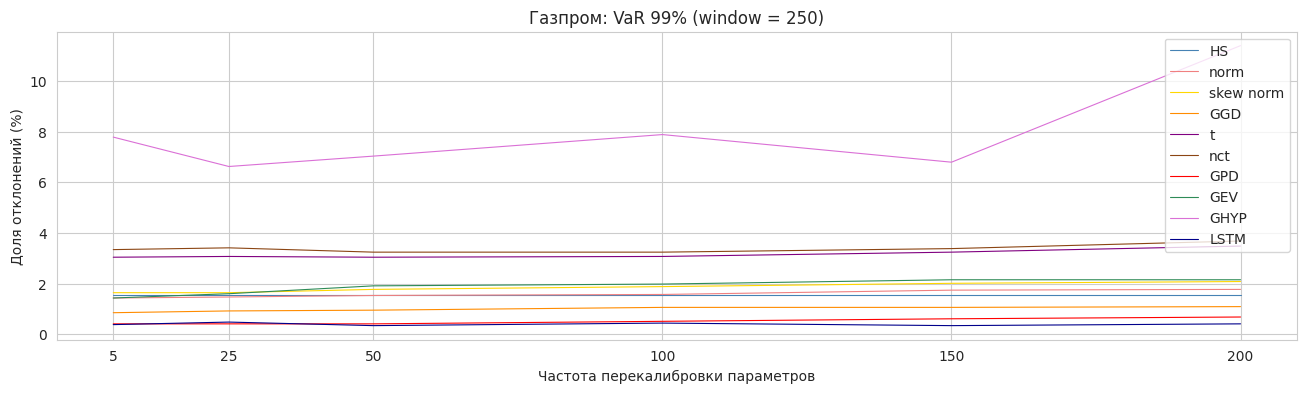

In [ ]:
gazp_res.plot_parametr_frequency(window=250)

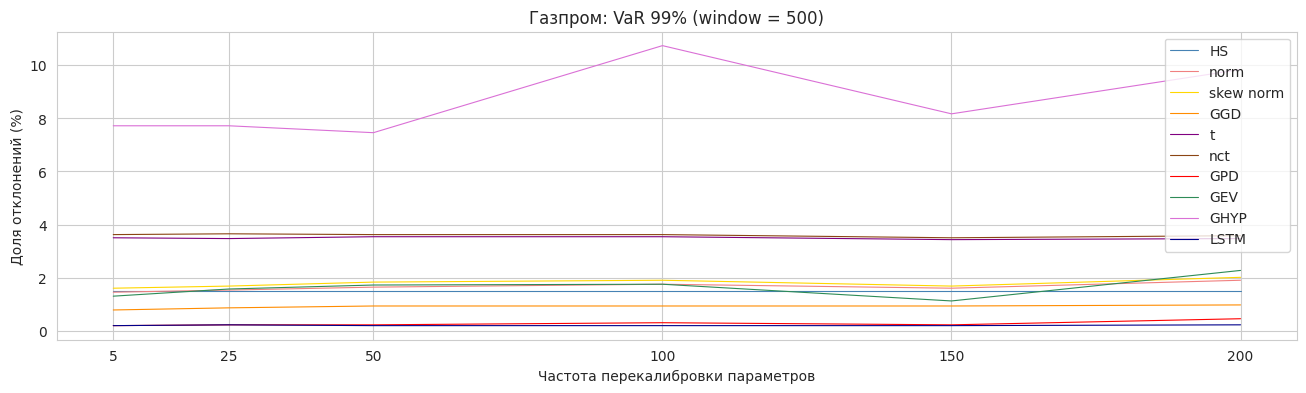

In [ ]:
gazp_res.plot_parametr_frequency(window=500)

## Курс евро

In [ ]:
euro = calculate_returns(df=df_price, name='EUR_RUB')

In [ ]:
warnings.filterwarnings("ignore")

calculate_var(name='EUR_RUB', returns=euro, file_name='final',
              freq_lst=[5, 25, 50])

In [ ]:
df_euro = download_data('EUR_RUB', file_name='final')

In [ ]:
euro_res = VAR_visualisation(name='BCOMCO', df_var=df_euro, models=['GGD', 'GPD', 'GEV'])

In [ ]:
euro_res.test_kupiec_all()

In [ ]:
euro_res.test_christoffersen_all()

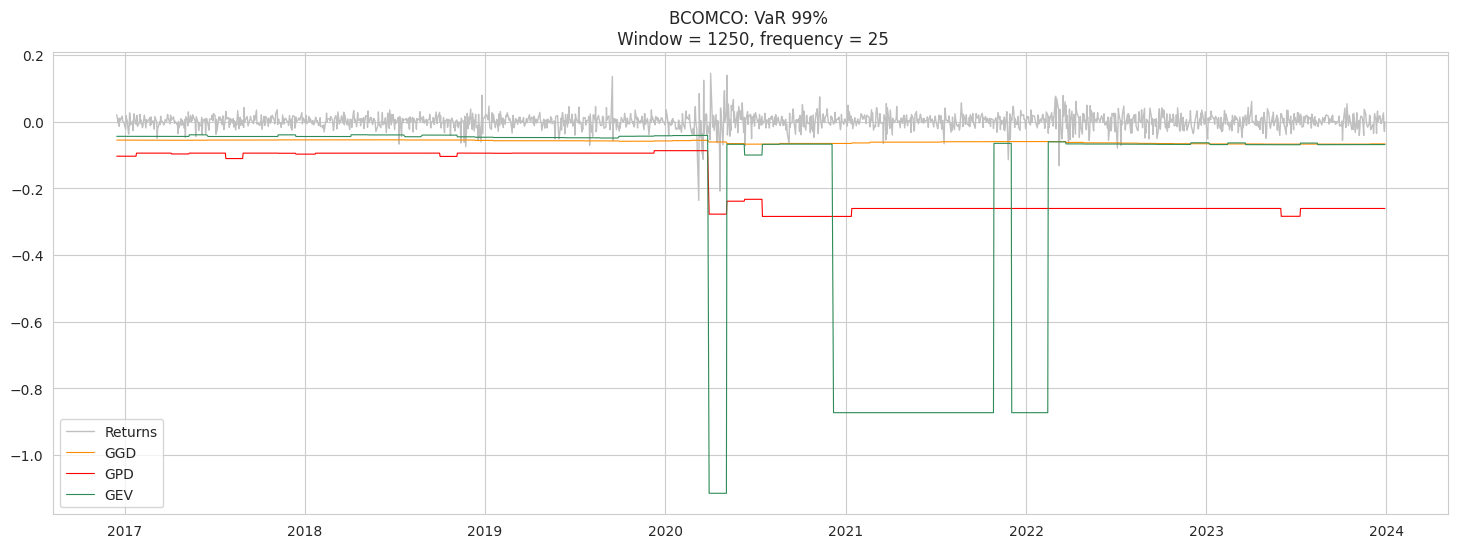

In [ ]:
euro_res.plot_backtest(window=1250, freq=25)

In [ ]:
df_euro2 = download_data('EUR_RUB', file_name='test_2')

In [ ]:
euro_res1 = VAR_visualisation(name='EUR_RUB', df_var=df_euro2, models=['GGD', 'GPD', 'GEV'])

In [ ]:
euro_res1.test_kupiec_all()

In [ ]:
euro_res1.test_christoffersen_all()